# 05. CNN(Convolutional Neural Network) 실습
---




**목차**
> * 실습
  * 데이터
    1. 데이터 불러오기
    2. 데이터 분포 시각화
    3. 데이터 전처리
    4. 테스트셋 분리
  * 모델
    1. 모델 구현
    2. 학습
  * 성능평가
    1. Softmax regression
    2. DNN
* 과제


```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import models, layers

## **실습**

---
### **데이터**
---

#### (1) **이미지 데이터의 특징**

In [ ]:
# height, width, channel(dimension)

#### **(2) MNIST 데이터셋**

In [ ]:
from tensorflow.keras import datasets

(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* 이미지 시각화

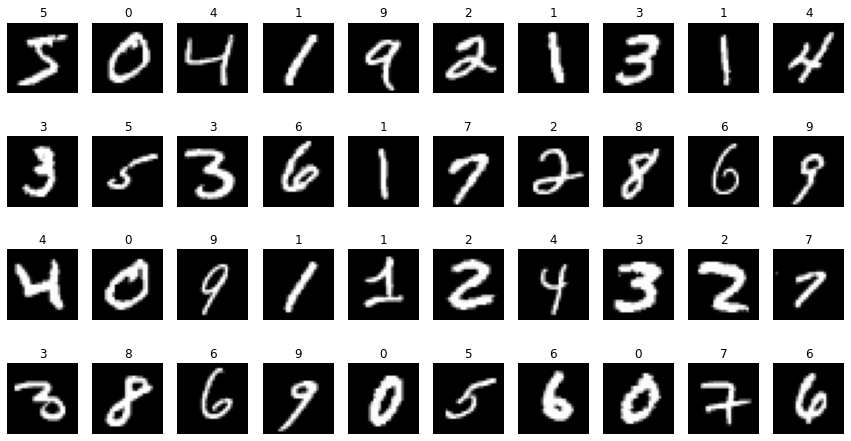

In [ ]:
plt.figure(figsize=(15,8))
for i in range(40):
  plt.subplot(4,10, i+1) # 세로, 가로 i+1부터 시작
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  plt.title(y_train[i])
plt.show()

#### **(3) 데이터 전처리**

* 분포 시각화

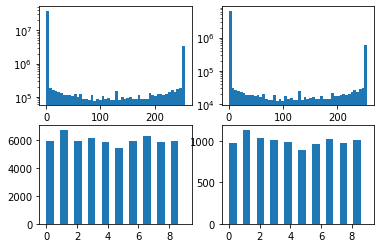

In [ ]:
plt.subplot(2,2,1)
plt.hist(x_train.flatten(), bins=50, log=True)

plt.subplot(2,2,2)
plt.hist(x_test.flatten(), bins=50, log=True)

plt.subplot(2,2,3)
plt.hist(y_train, width=0.5)

plt.subplot(2,2,4)
plt.hist(y_test, width=0.5)

plt.show()

흰색과 까만색 밖에 없으니 x값은 극단으로 분포

* 정규화
  * `0~255` 사이의 값 → `0~1` 사이의 값으로 변환

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

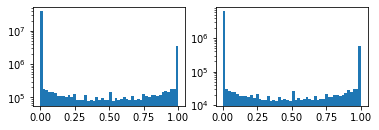

In [ ]:
plt.subplot(2,2,1)
plt.hist(x_train.flatten(), bins=50, log=True)
# flatten Flatten 사용 구분 필요
plt.subplot(2,2,2)
plt.hist(x_test.flatten(), bins=50, log=True)

plt.show()

* 텐서플로우 케라스 입력 형식으로 변환 (Batch size, W, H, C)

In [ ]:
x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

---
### **모델**
---

딥러닝 모델 구성과 학습과정은 크게 세가지로 나뉩니다.

* 모델 구현 : 원하는 레이어를 이용해 모델을 만듭니다.
* 컴파일: 학습전 적절한 손실함수와 적절한 옵티마이저를 정의해 줍니다.
* 학습: 학습을 진행합니다.

#### **(1) 모델구현**


In [ ]:
from tensorflow.keras import layers, models

* **Softmax regression**

In [ ]:
x = layers.Input(shape=(28,28,1))
# 중간에 한줄로 펼쳐줄 녀석이 필요
z = layers.Flatten()(x)
y = layers.Dense(10, activation='softmax')(z)

sr = models.Model(x,y, name='SoftmaxRegression')
sr.summary()

Model: "SoftmaxRegression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


* **DNN**

In [ ]:
x = layers.Input(shape=(28,28,1))
# 중간에 한줄로 펼쳐줄 녀석이 필요
z = layers.Flatten()(x)
# 층 2개를 더 쌓는다 쿠션인가
z = layers.Dense(256, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
y = layers.Dense(10, activation='softmax')(z)

dnn = models.Model(x,y, name='DNN')
dnn.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


* **CNN**

In [ ]:
from tensorflow.python.keras.layers.convolutional import Conv2D
x = layers.Input(shape=(28,28,1))
# 중간에 한줄로 펼쳐줄 녀석이 필요

z = layers.Conv2D(3, 5, activation='relu')(x) # 필터채널, 커널
z = layers.MaxPool2D(5)(z) # 커널

z = layers.Flatten()(z)
y = layers.Dense(10, activation='softmax')(z)

cnn = models.Model(x,y, name="CNN")
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 3)         78        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 3)          0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                490       
                                                                 
Total params: 568
Trainable params: 568
Non-trainable params: 0
_________________________________________________________________

#### **(2) 컴파일**


In [ ]:
from tensorflow.keras import optimizers

* **Softmax Regression**

In [ ]:
sr.compile( loss = 'sparse_categorical_crossentropy',
            optimizer=optimizers.SGD(learning_rate=0.01),
            metrics=['acc']
          )

* **DNN**

In [ ]:
dnn.compile( loss = 'sparse_categorical_crossentropy',
            optimizer=optimizers.SGD(learning_rate=0.01),
            metrics=['acc']
          )

* **CNN**

In [ ]:
cnn.compile( loss = 'sparse_categorical_crossentropy',
            optimizer=optimizers.SGD(learning_rate=0.01),
            metrics=['acc']
          )

#### **(3) 학습**

* **Softmax Regression**

In [ ]:
history_sr = sr.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 1.2865 - acc: 0.6944
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7154 - acc: 0.8400
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5859 - acc: 0.8595
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5241 - acc: 0.8692
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4865 - acc: 0.8759
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4607 - acc: 0.8800
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4414 - acc: 0.8835
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4266 - acc: 0.8870
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4146 - acc: 0.8893
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4046 - acc: 0.8912


* **DNN**

In [ ]:
history_dnn = dnn.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.2065 - acc: 0.6963
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4820 - acc: 0.8744
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3763 - acc: 0.8961
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3322 - acc: 0.9067
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3050 - acc: 0.9135
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2848 - acc: 0.9193
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2690 - acc: 0.9237
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2552 - acc: 0.9275
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2431 - acc: 0.9308
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2325 - acc: 0.9336


* **CNN**

In [ ]:
history_cnn = cnn.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.7803 - acc: 0.4375
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7911 - acc: 0.7804
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4989 - acc: 0.8552
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3989 - acc: 0.8839
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3484 - acc: 0.8973
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3175 - acc: 0.9059
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2963 - acc: 0.9115
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2807 - acc: 0.9160
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2689 - acc: 0.9197
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2592 - acc: 0.9223


---
### **성능평가**
---

* 혼돈행렬 플롯

In [ ]:
from sklearn import metrics

def plot_cm(model, x_test, y_test):
  y_pred = model.predict(x_test)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=1))
  #print(m)
  sns.heatmap(m, annot=True)
  plt.show()

* 학습 커브 플롯

In [ ]:
def plot_lcurve(history):
  acc_plot = history.history['acc']
  loss_plot = history.history['loss']

  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  acc_ax.plot(acc_plot, c='orangered', label='Acc', marker='.')
  loss_ax.plot(loss_plot, c='dodgerblue', label='Loss', marker='.')

  acc_ax.set_ylabel("accuracy")
  loss_ax.set_ylabel("loss")

  acc_ax.legend(loc='upper right')
  loss_ax.legend(loc='upper left')

  plt.show()

#### **(1) Softmax Regression**

* 테스트셋 평가

In [ ]:
sr.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3797 - acc: 0.8984


[0.3796764314174652, 0.8984000086784363]

* 혼돈 행렬

(10000, 10)


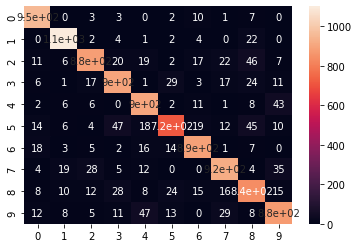

In [ ]:
plot_cm(sr, x_test, y_test)

* 학습과정 시각화

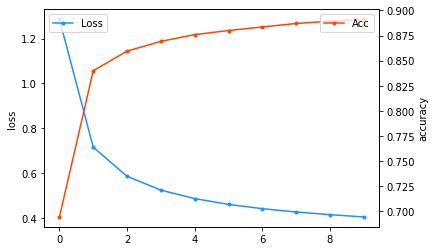

In [ ]:
plot_lcurve(history_sr)

#### **(2) DNN**

* 테스트셋 평가

In [ ]:
dnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2217 - acc: 0.9362


[0.2217320054769516, 0.9362000226974487]

* 혼돈 행렬

(10000, 10)


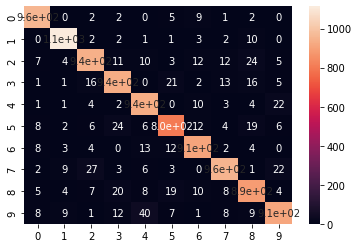

In [ ]:
plot_cm(dnn, x_test, y_test)

* 학습과정 시각화

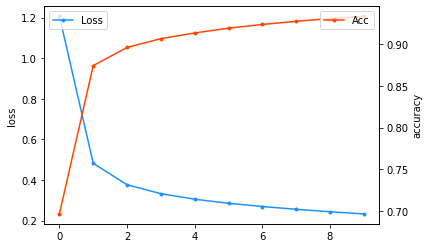

In [ ]:
plot_lcurve(history_dnn)

#### **(3) CNN**


* 테스트셋 평가

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2374 - acc: 0.9301


[0.23738615214824677, 0.9301000237464905]

* 혼돈 행렬

(10000, 10)


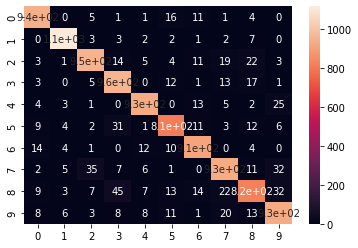

In [ ]:
plot_cm(cnn, x_test, y_test)

* 학습과정 시각화

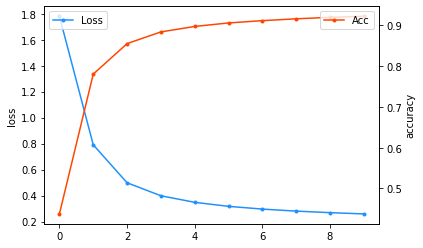

In [ ]:
plot_lcurve(history_cnn)

## **과제**


---
### **과제01**
---

위에서 만든 CNN 모델을 변형하여 성능을 올려 보세요.
* 모델 구조를 변경해보세요(레이어 추가 혹은 가중치 차원 증가)
* 훈련시 로스함수와 옵티마이저함수를 조정해보세요
* 훈련시 학습회수와 배치사이즈를 조정해보세요

---
### **과제02**
---
데이콘에서 아래 의류이미지 데이터를 다운받고 CNN을 이용해서 분류하세요. 테스트셋을 예측하고 리더보드에 제출하세요

https://dacon.io/competitions/open/235594/data

In [ ]:
from tensorflow.keras import datasets

(x_train, y_train),(x_test, y_test) = datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))